# **Data Cleaning**

**Load the Data:**


Import necessary libraries (e.g., pandas, numpy) and load the dataset into a DataFrame.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/boxoffice.csv')


**Check for Missing Values:**

Identify and handle any missing or null values

In [ ]:
print(df.isnull().sum())
df = df.dropna()  # or use imputation strategies depending on the context


rank               0
title              0
studio            35
lifetime_gross     0
year               0
dtype: int64


**Data Types and Conversion:**

Ensure data types are correct and convert them if necessary.

In [ ]:
df['year'] = df['year'].astype(int)
df['lifetime_gross'] = df['lifetime_gross'].astype(float)


**Remove Duplicates:**

Check for and remove any duplicate rows.

In [ ]:
df = df.drop_duplicates()


**Normalize or Standardize Data (if needed):**

This is particularly useful for numerical features when applying machine learning models.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['lifetime_gross'] = scaler.fit_transform(df[['lifetime_gross']])


**Check for Outliers:**

Use visualizations or statistical methods to identify and handle outliers.

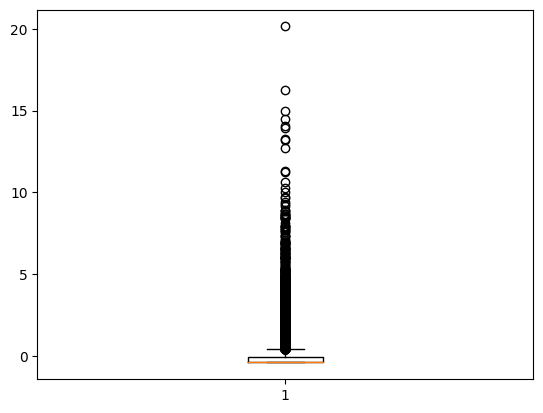

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['lifetime_gross'])
plt.show()


# **Exploratory Data Analysis (EDA)**

**Summary Statistics:**

Get an overview of the data with summary statistics

In [ ]:
print(df.describe())


               rank  lifetime_gross          year
count  15708.000000    1.570800e+04  15708.000000
mean    7860.881844    5.790010e-17   2003.469761
std     4541.552556    1.000032e+00     11.156591
min        1.000000   -3.949595e-01   1921.000000
25%     3928.750000   -3.937398e-01   1996.000000
50%     7856.500000   -3.756035e-01   2006.000000
75%    11789.250000   -6.588350e-02   2013.000000
max    15743.000000    2.013600e+01   2018.000000


**Distribution Analysis:**

Plot histograms to understand the distribution of numerical columns.

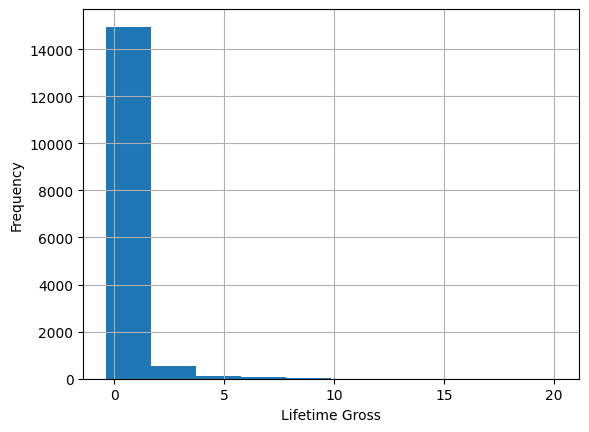

In [ ]:
df['lifetime_gross'].hist()
plt.xlabel('Lifetime Gross')
plt.ylabel('Frequency')
plt.show()


**Yearly Trends:**

Analyze trends over the years.

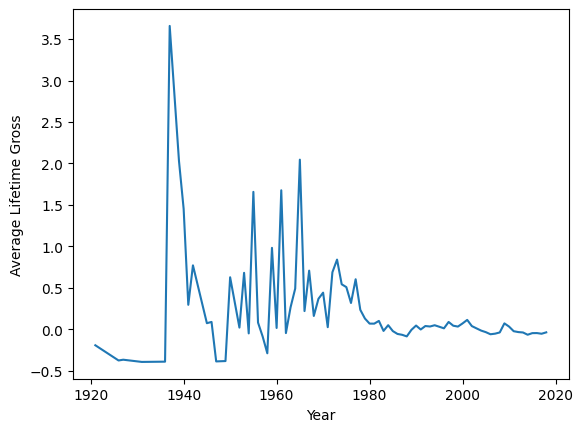

In [ ]:
df.groupby('year')['lifetime_gross'].mean().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Lifetime Gross')
plt.show()


**Box Plot by Studio:**

Compare lifetime gross across different studios.

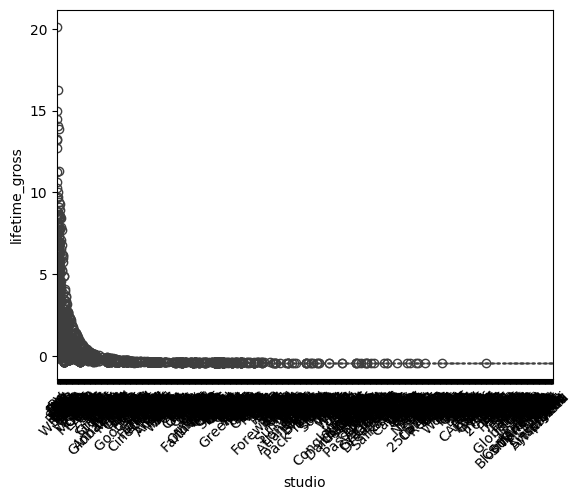

In [ ]:
import seaborn as sns

sns.boxplot(x='studio', y='lifetime_gross', data=df)
plt.xticks(rotation=45)
plt.show()


**Correlation Analysis:**

Examine correlations between numerical features.

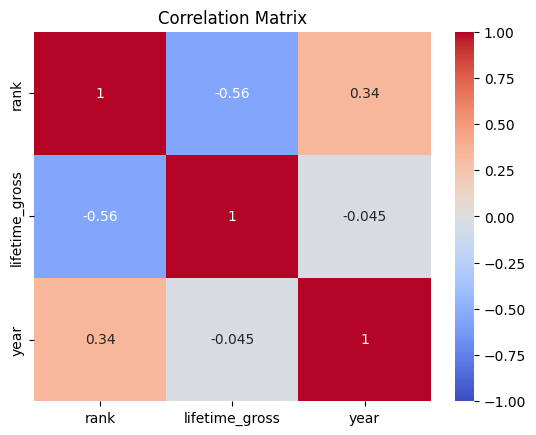

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df[['rank', 'lifetime_gross', 'year']]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


**Top Movies by Gross:**

Identify top movies by lifetime gross.

In [ ]:
top_movies = df.sort_values(by='lifetime_gross', ascending=False).head(10)
print(top_movies)


   rank                         title studio  lifetime_gross  year
0     1  Star Wars: The Force Awakens     BV       20.136001  2015
1     2                        Avatar    Fox       16.274819  2009
2     3                 Black Panther     BV       14.949841  2018
3     4        Avengers: Infinity War     BV       14.481253  2018
4     5                       Titanic   Par.       14.057822  1997
5     6                Jurassic World   Uni.       13.902342  2015
6     7         Marvel's The Avengers     BV       13.268596  2012
7     8      Star Wars: The Last Jedi     BV       13.198969  2017
8     9                 Incredibles 2     BV       12.692317  2018
9    10               The Dark Knight     WB       11.328751  2008


# **Prediction**

**Feature and Target Definition:**

Features: rank, studio, year
Target: lifetime_gross

In [33]:
# Features and target
X = df[['rank', 'studio', 'year']]  # Adjust columns as necessary
y = df['lifetime_gross']

**Import Libraries:**

Import necessary libraries for data manipulation, model building, and saving.

In [34]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


**Preprocessing:**

StandardScaler: Normalizes the numeric features (rank, year).

OneHotEncoder: Encodes the categorical feature (studio).

In [35]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['rank', 'year']),
        ('cat', OneHotEncoder(), ['studio'])
    ])


**Pipeline Creation:**

Pipeline: Combines preprocessing and regression steps into a single workflow.

LinearRegression: The regression model used to predict lifetime_gross.

In [36]:
# Create and train the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


**Model Training:**

Split the dataset into training and testing sets.
Fit the model using the training data.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rank', 'year']),
                                                 ('cat', OneHotEncoder(),
                                                  ['studio'])])),
                ('regressor', LinearRegression())])

**Model Saving:**

Save the trained model and preprocessing pipeline to a pickle file for future use.

In [38]:
# Save the model and preprocessor to a pickle file
with open('box_office_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [32]:
df

,rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avatar,Fox,760507625,2009
2,3,Black Panther,BV,700059566,2018
3,4,Avengers: Infinity War,BV,678681680,2018
4,5,Titanic,Par.,659363944,1997
...,...,...,...,...,...
15738,15739,Dog Eat Dog,IFC,80,2009
15739,15740,Paranoid Girls,NaN,78,2015
15740,15741,Confession of a Child of the Century,Cohen,74,2015
15741,15742,Storage 24,Magn.,72,2013
